In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# ===== Functions =====
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [4]:
def initialize_centroids(X, k):
    np.random.seed(0)
    indices = np.random.choice(len(X), k, replace=False)
    return X[indices]

In [5]:
def assign_clusters(X, centroids):
    clusters = []
    for x in X:
        distances = [euclidean_distance(x, c) for c in centroids]
        clusters.append(np.argmin(distances))
    return np.array(clusters)

In [6]:
def update_centroids(X, clusters, k):
    centroids = []
    for i in range(k):
        points = X[clusters == i]
        if len(points) > 0:
            centroids.append(np.mean(points, axis=0))
        else:
            # handle empty cluster (rare)
            centroids.append(np.random.rand(X.shape[1]))
    return np.array(centroids)

In [7]:
def kmeans(X, k=2, max_iters=10):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters


In [ ]:
def plot_clusters(X, centroids, clusters):
    # plt.figure(figsize=(6, 5))
    for i in range(len(centroids)):
        points = X[clusters == i]
        plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i+1}')
    
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=150, label='Centroids')
    plt.title("K-Means Clustering Result")
    plt.legend()
    plt.grid(True)
    plt.show()


Final Centroids:
 [[1.5 2.5]
 [5.5 8.5]]
Cluster Assignments: [0 0 1 1]


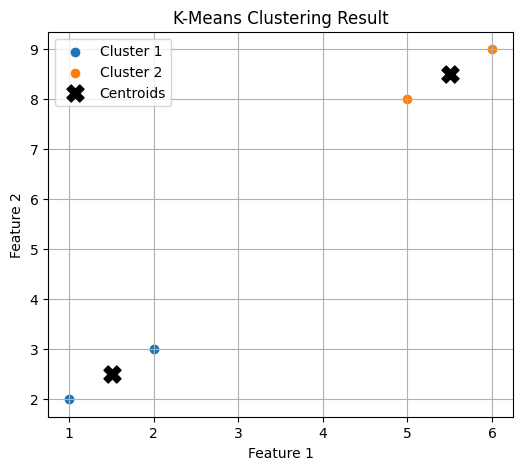

In [8]:
# ===== Demo =====
X = np.array([[1, 2], [2, 3], [5, 8], [6, 9]])
centroids, clusters = kmeans(X, k=2)
print("Final Centroids:\n", centroids)
print("Cluster Assignments:", clusters)

# ===== Plot =====
plot_clusters(X, centroids, clusters)
